In [1]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
from matplotlib import cm as cm
from tweepy import OAuthHandler
import json
import warnings
warnings.filterwarnings('ignore')
from timeit import default_timer as timer
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

# Gather The Data

In [2]:
# Read the twitter-archive-enhanced CSV file
TArchive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
TArchive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# download the image-predictions.tsv file programmatically using the Requests library 
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
Response = requests.get(link)
Fname = 'image-predictions'
if not os.path.exists(Fname):
    os.makedirs(Fname)    
with open(os.path.join(Fname, link.split('/')[-1]), mode='wb') as file:
    file.write(Response.content)

In [4]:
# Check for the image-predictions.tsv file
os.listdir(Fname)

['image-predictions.tsv']

In [5]:
# Read the image-predictions.tsv file
IPredictions_df = pd.read_csv(Fname + '/image-predictions.tsv', sep='\t')
IPredictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Check for API
api

In [8]:
# Check the column name of the tweets IDs Archive data frame
TArchive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [9]:
tweet_ids = TArchive_df.tweet_id.values
len(tweet_ids)

2356

In [10]:
tweets=pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [11]:
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [12]:
tweets.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

#### I think the most important columns are "id" , "retweet_count" and "favorite_count" columns

### Check for duplicates

In [13]:
TArchive_df.tweet_id.duplicated().sum()

0

In [14]:
IPredictions_df.tweet_id.duplicated().sum()

0

In [15]:
tweets.id.duplicated().sum()

0

#### There is no duplicated rows

# Assesing the data

In [16]:
# Display the TArchive_df table
TArchive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### to make this Twitter archive enhanced. Of the 5000+ tweets, we have filtered for tweets with ratings only (there are 2356).

In [17]:
#TArchive_df descriptive statistics 
TArchive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
#Checking for NULL values and the datatypes
TArchive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
#Checking the rating values for numerator 
TArchive_df['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [20]:
#Checking the rating values for  denominator
TArchive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
#identify the rating with 0
TArchive_df[TArchive_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [22]:
#Check the dogs names
dog_names = []
dog_names = TArchive_df['name'].unique()
dog_names

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [23]:
#Check the complete text
text = TArchive_df['text'][320]
text

'Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe'

### check for Quality and tidiness in the TArchive_df :
#### Quality :
> unusual names found for dogs such as : 'just', 'life', 'mad', 'my','old', 'one', 'quite', 'space',  'not', 'officially', 'such', 'the', 'this', 'unacceptable', 'very'

> Missing values in columns from in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

> tweet id 835246439529840640 has a rating of denominator = 0

> timestamp and retweeted_status_timestamp must be of datetime datatype instead of the object datatype

#### Tidiness :
> Dog stages are found in multiple columns

In [24]:
# Display the image predictions table
IPredictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
IPredictions_df.shape

(2075, 12)

In [26]:
# check for NULL values and Datatypes
IPredictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### There is No Null values

### check for Quality and tidiness in the IPredictions_df :
#### Quality :
> only 2075 tweet Ids have images
#### Tidiness :
> all the tweets information is found with TArchive_df so All the prediction outputs from different algorithms have to be joined with TArchive_df

In [27]:
# Display the tweets table
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [28]:
tweets.shape

(2354, 31)

In [29]:
# check for NULL values and Datatypes
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

#### Quality :
> Missing values in many columns but for most important columns that i will use (retweet_count and favorite_count) there is no missing values

# Cleaning the data

### Define
> Create a copy from all the dataframes

### Code

In [30]:
Archive_clean = TArchive_df.copy()
Tweets_clean = tweets.copy()
Img_pred_clean = IPredictions_df.copy()

### Convert the datatype of "tweet_id" to string

In [31]:
Archive_clean['tweet_id'] = Archive_clean['tweet_id'].astype(str)
Img_pred_clean['tweet_id'] = Img_pred_clean['tweet_id'].astype(str)

### Test

In [32]:
Archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [33]:
Img_pred_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### extracting the most important columns from Tweets_clean

In [34]:
Tweets_clean=Tweets_clean[['id','retweet_count','favorite_count']]

In [35]:
Tweets_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [36]:
Tweets_clean.rename(columns ={'id':'tweet_id'},inplace=True)
Tweets_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### Define
> Change the datatype of tweet_id to be string

### Code

In [37]:
Tweets_clean['tweet_id'] = Tweets_clean['tweet_id'].astype(str)

### Test

In [38]:
Tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Define
> Create a universe dataset joining all the dataframes based on the tweet_id

### Code

In [39]:
Archive_clean = pd.merge(Archive_clean, Tweets_clean, how = 'inner', on = 'tweet_id')

In [40]:
Archive_clean = pd.merge(Archive_clean, Img_pred_clean, how = 'inner', on = 'tweet_id')

### Test

In [41]:
Archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [42]:
Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073

In [43]:
Archive_clean.shape

(2073, 30)

### Define
> Convert the dog stage or category into one column instead of multiple columns

### Code

In [44]:
Archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [45]:
#Archive_clean.replace({None, 'null'})

In [46]:
Archive_clean = pd.melt(Archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 
                              'jpg_url', 'img_num',
                           'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                           'p3_dog'],
                        value_name='dog_stage')

In [47]:
#Archive_clean = Archive_clean['doggo']+Archive_clean['pupper']+Archive_clean['puppo']+Archive_clean['floofer']

### Test

In [48]:
Archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,variable,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None


### Define
> Drop 'variable' column

### Code

In [49]:
Archive_clean.drop(['variable'], axis=1,inplace= True)

### Test

In [50]:
Archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None


### Define
> Drop duplicates

### Code

In [51]:
Archive_clean = Archive_clean.drop_duplicates()

In [52]:
# Shape of Archive_clean
Archive_clean.shape

(6552, 25)

### Test

In [53]:
Archive_clean.tweet_id.duplicated().sum()

4479

#### Still there are duplicated rows becuase the count has increased . These duplicated rows might have occured due to multiple tagging done with dog_status

### Define
> clean the rows with only one dog_status column value.

### Code

In [54]:
Archive_clean.dog_stage.unique()

array(['None', 'doggo', 'floofer', ..., 111, 128, 2535], dtype=object)

In [55]:
Archive_clean=Archive_clean.loc[Archive_clean['dog_stage'].isin(['None','pupper','doggo','puppo','floofer'])]

In [56]:
Archive_clean.dog_stage.value_counts()

None       2073
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [57]:
# Identify the duplicate rows at tweet_id and dog_stage combination
dup_tweet_dog_stage = Archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_tweet_dog_stage.shape

(2406, 25)

In [58]:
# Selecting the rows with dog_stage without "None"
dup_tweet_dog_stage_2 = dup_tweet_dog_stage[dup_tweet_dog_stage['dog_stage'] != 'None']
dup_tweet_dog_stage_2.shape

(333, 25)

In [59]:
dup_tweet_dog_stage_2['tweet_id'].value_counts().head()

785639753186217984    2
808106460588765185    2
751583847268179968    2
817777686764523521    2
741067306818797568    2
Name: tweet_id, dtype: int64

### Test

In [60]:
#Checking the multiple rows information with different dog_stage
dup_tweet_dog_stage_2[dup_tweet_dog_stage_2['tweet_id'] == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
366,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4512,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [61]:
#Checking the multiple rows information with different dog_stage and its text
dup_tweet_dog_stage_2[dup_tweet_dog_stage_2['tweet_id'] == '817777686764523521']['text']

366     This is Dido. She's playing the lead role in "...
4512    This is Dido. She's playing the lead role in "...
Name: text, dtype: object

In [62]:
# making a bool series 
bool_series = dup_tweet_dog_stage_2["tweet_id"].duplicated(keep = False) 
  
# bool series 
bool_series 
  
# passing NOT of bool series to see unique values only 
dup_tweet_dog_stage_2 = dup_tweet_dog_stage_2[~bool_series]

In [63]:
dup_tweet_dog_stage_2.shape

(307, 25)

In [64]:
dup_tweet_dog_stage_2.tweet_id.duplicated().sum()

0

In [65]:
# Keeping the random row which has dog_stage other than None 
dup_tweet_dog_stage_3 = dup_tweet_dog_stage_2.drop_duplicates(subset=['tweet_id'])

In [66]:
dup_tweet_dog_stage_3.shape

(307, 25)

In [67]:
# Combine
dup_df1 = dup_tweet_dog_stage.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_tweet_dog_stage_3)
dup_df_merged.shape

(2060, 25)

### Test

In [68]:
dup_df_merged.tweet_id.duplicated().sum()

0

In [69]:
dup_df_merged.dog_stage.value_counts()

None       1753
pupper      210
doggo        67
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [70]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 7108
Data columns (total 25 columns):
tweet_id                      2060 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2060 non-null object
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
jpg_url                       2060 non-null object
img_num                       2060 non-null int64
p1                            2060 non-null object
p1_conf                       2060 non-null float64
p1_dog                        2060

In [71]:
archive_clean = dup_df_merged.copy()

### Define
> Convert (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id) into Object or string

### Code

In [72]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

### Test

In [73]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 7108
Data columns (total 25 columns):
tweet_id                      2060 non-null object
in_reply_to_status_id         2060 non-null object
in_reply_to_user_id           2060 non-null object
timestamp                     2060 non-null object
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           2060 non-null object
retweeted_status_user_id      2060 non-null object
retweeted_status_timestamp    77 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
jpg_url                       2060 non-null object
img_num                       2060 non-null int64
p1                            2060 non-null object
p1_conf                       2060 non-null float64
p1_dog                        

### Define
Convert (retweeted_status_timestamp) into datetime format

### Code

In [74]:
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp) 
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

### Test

In [75]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 7108
Data columns (total 25 columns):
tweet_id                      2060 non-null object
in_reply_to_status_id         2060 non-null object
in_reply_to_user_id           2060 non-null object
timestamp                     2060 non-null datetime64[ns]
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           2060 non-null object
retweeted_status_user_id      2060 non-null object
retweeted_status_timestamp    77 non-null datetime64[ns]
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
jpg_url                       2060 non-null object
img_num                       2060 non-null int64
p1                            2060 non-null object
p1_conf                       2060 non-null float64
p1_dog        

### Define
> increase the text format representation

### Code

In [76]:
pd.set_option('display.max_colwidth', -1)

### Test

In [77]:
archive_clean.text[archive_clean.name =='infuriating']

1050    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object

In [78]:
archive_clean.text[archive_clean.name =='just']

1741    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5373    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object

In [79]:
archive_clean.text[archive_clean.name =='life']

Series([], Name: text, dtype: object)

In [80]:
archive_clean.text[archive_clean.name =='light']

1723    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object

### Define
> unused names found for dogs

In [81]:
l = ['just', 'life', 'mad', 'my','old', 'one', 'quite', 'space', 'not', 'officially', 'such', 'the', 'this', 'unacceptable', 'very']

for word in l:
    print(archive_clean.text[archive_clean.name == word])

1741    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5373    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
690    This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
Name: text, dtype: object
Series([], Name: text, dtype: object)
293     Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK                                    
815     This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd
755     This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k
5805    This is one esteemed pupper. Just graduated college. 10

#### replace the values with "No_Name"

In [82]:
for word in l:    
     archive_clean.name[archive_clean.name == word] = 'None'

In [83]:
l = ['just', 'life', 'mad', 'my','old', 'one', 'quite', 'space', 'not', 'officially', 'such', 'the', 'this', 'unacceptable', 'very']

for word in l:
    print(archive_clean.text[archive_clean.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


### Test

In [84]:
archive_clean.name.value_counts()[:10]

None       597
a          55 
Charlie    11 
Oliver     10 
Tucker     10 
Penny      10 
Lucy       10 
Cooper     10 
Lola       8  
Bo         8  
Name: name, dtype: int64

### Define
> rating_numerator and rating_denominator have some incosistent values in the numerator and denominator (some of them showing as high as 1776, 170 respectively). In one tweet_id , the rating for denominator is shown as 0. Hence, I am assuming the ratings are done purely on a humouros basis.Hence we are seeing the wide range of values. I am not going to disturb the ratings provided here.

In [85]:
archive_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    1983
expanded_urls                 0   
rating_numerator              0   
rating_denominator            0   
name                          0   
jpg_url                       0   
img_num                       0   
p1                            0   
p1_conf                       0   
p1_dog                        0   
p2                            0   
p2_conf                       0   
p2_dog                        0   
p3                            0   
p3_conf                       0   
p3_dog                        0   
dog_stage                     0   
dtype: int64

### Define
> there is null values in retweeted_status_timestamp 

### Code

In [86]:
archive_clean.drop(['retweeted_status_timestamp'],axis=1, inplace= True)

In [87]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 7108
Data columns (total 24 columns):
tweet_id                    2060 non-null object
in_reply_to_status_id       2060 non-null object
in_reply_to_user_id         2060 non-null object
timestamp                   2060 non-null datetime64[ns]
source                      2060 non-null object
text                        2060 non-null object
retweeted_status_id         2060 non-null object
retweeted_status_user_id    2060 non-null object
expanded_urls               2060 non-null object
rating_numerator            2060 non-null int64
rating_denominator          2060 non-null int64
name                        2060 non-null object
jpg_url                     2060 non-null object
img_num                     2060 non-null int64
p1                          2060 non-null object
p1_conf                     2060 non-null float64
p1_dog                      2060 non-null bool
p2                          2060 non-null object
p2_conf

## Store Data

In [88]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analysis & Visualization

In [89]:
Archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dog_stage'],
      dtype='object')

In [90]:
Tweets_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### visualize the most important columns ('retweet_count', 'favorite_count')

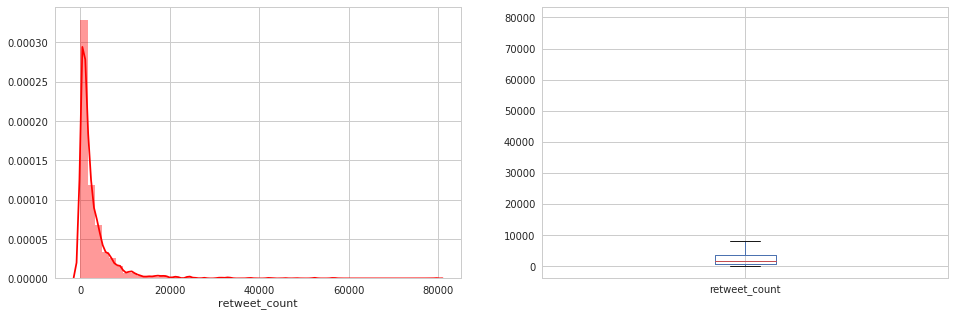

In [91]:
plt.figure(1)
plt.subplot(121)
sns.distplot(Tweets_clean['retweet_count'], color = 'Red')


plt.subplot(122)
Tweets_clean['retweet_count'].plot.box(figsize=(16,5))

plt.show()

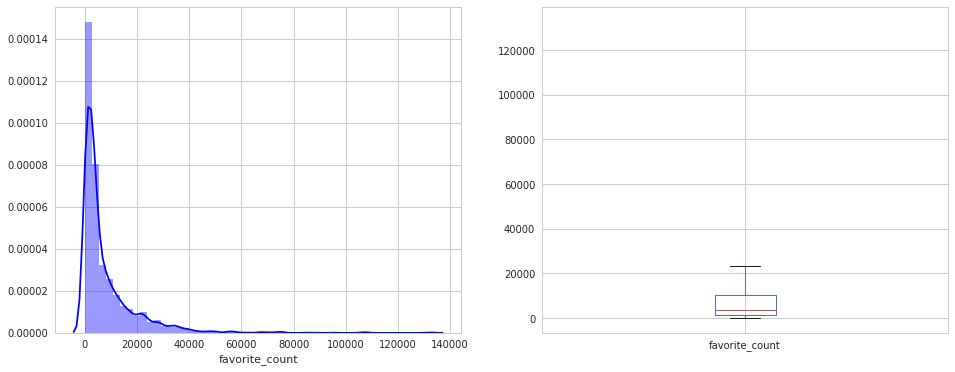

In [92]:
plt.figure(1)
plt.subplot(121)
sns.distplot(Tweets_clean['favorite_count'], color = 'blue')


plt.subplot(122)
Tweets_clean['favorite_count'].plot.box(figsize=(16,6))

plt.show()

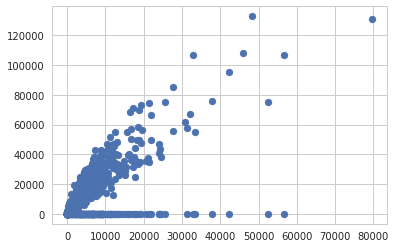

In [93]:
plt.scatter(data = Tweets_clean, x = 'retweet_count', y = 'favorite_count')

### There is a correlation between the retweet_count and the favorite_count

### look at the image predictions output which shows the output produced from different algorithms.

Text(0,0.5,'Count %')

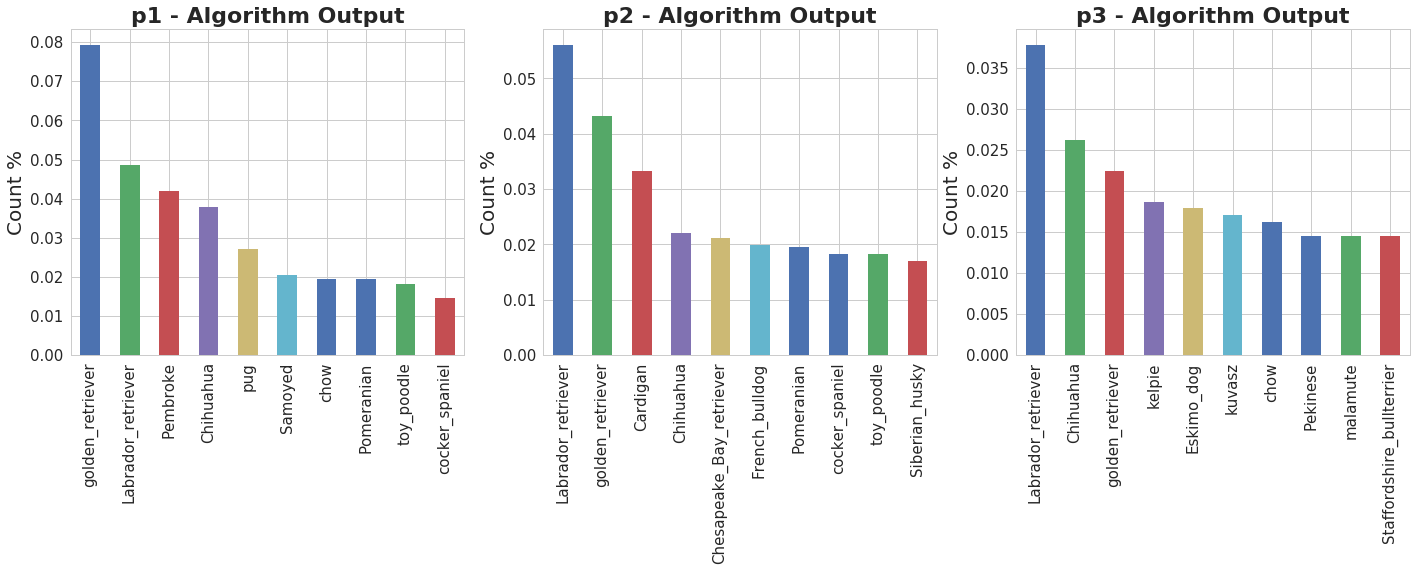

In [94]:
plt.figure(1)
plt.subplot(131)

Archive_clean['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p1 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
Archive_clean['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p2 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
Archive_clean['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p3 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

### Majority of the predictions by 3 algorithms is done for golden_retriever and Labrador_retriever

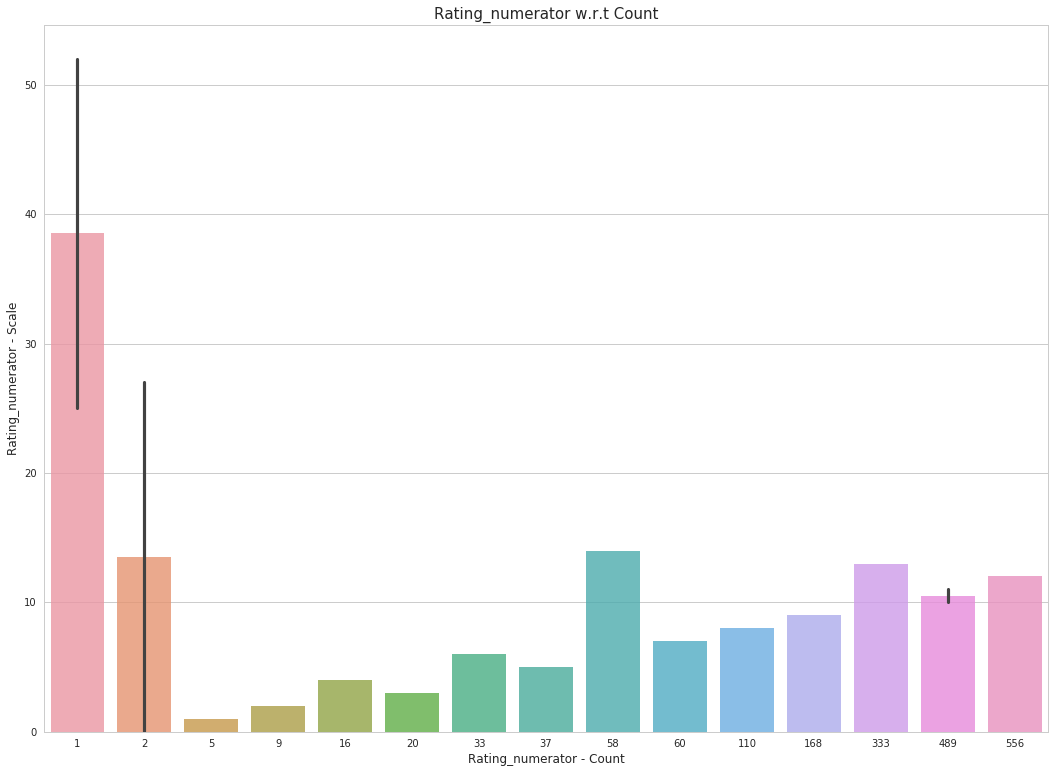

In [95]:
cnt_srs = Archive_clean['rating_numerator'].value_counts().head(20)
plt.figure(figsize=(18,13))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Rating_numerator - Count', fontsize=12)
plt.ylabel('Rating_numerator - Scale', fontsize=12)
plt.title("Rating_numerator w.r.t Count", fontsize=15)
plt.show()

In [96]:
Archive_clean[Archive_clean['rating_denominator'] < 10].shape

(2, 25)

In [97]:
Archive_clean[Archive_clean['rating_denominator'] > 10].shape

(16, 25)